# Clustering - Kmeans
1. Simple walk through example
2. Analysing songs
3. Cluster Validation
4. Kmeans Limitations

# Lab Part 1. KMeans

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
%matplotlib inline


In [2]:
# ------------------------------------------
# EXERCISE: Compute the centoid of the following data
#           [2, 5], [4, 4], [3, 3]
# ------------------------------------------

d = np.array([[2, 5], [4, 4], [3, 3]])
x, y = d.mean(axis=0)
x, y

(3.0, 4.0)

In [5]:
# Import iris data
iris = datasets.load_iris()
d = iris.data
np.random.seed(0)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

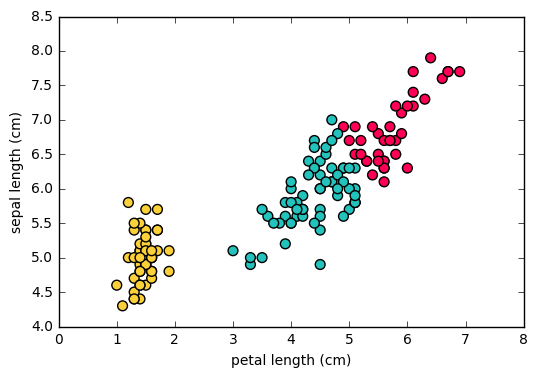

In [42]:
# Run KMeans using 3 clusters
est = KMeans(n_clusters=3, init='random')
est.fit(d)
y_kmeans = est.predict(d)
colors = np.array(['#FF0054','#FBD039','#23C2BC'])
plt.figure()
plt.scatter(d[:, 2], d[:, 0], c=colors[y_kmeans], s=50)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[0])

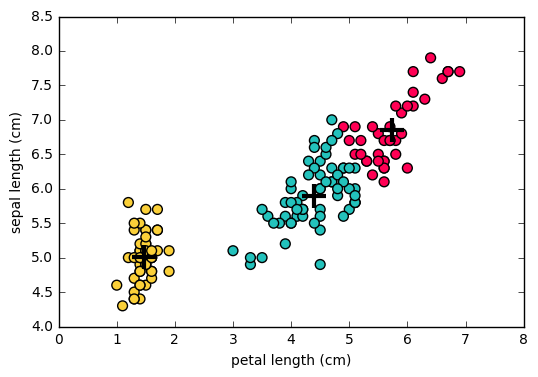

In [12]:
# ------------------------------------------
# Find the centers and plot them 
#     on the same graph.
# ------------------------------------------

centers = est.cluster_centers_
plt.figure()
plt.scatter(d[:, 2], d[:, 0], c=colors[y_kmeans], s=50)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[0])
plt.scatter(centers[:, 2], centers[:, 0], c='k', linewidths=3,
            marker='+', s=300)

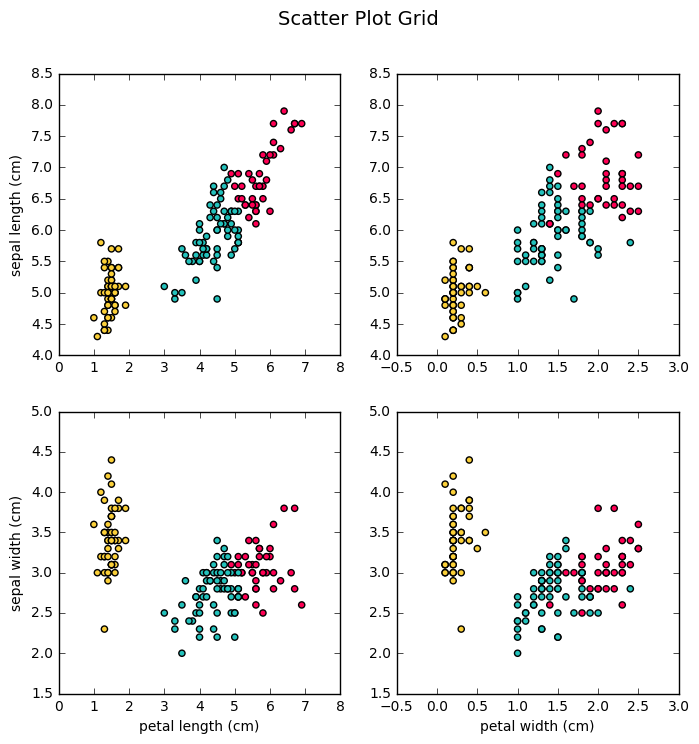

In [13]:
# Option #1: Scatter Plot Grid
plt.figure(figsize=(8, 8))
plt.suptitle('Scatter Plot Grid',  fontsize=14)
# Upper Left
plt.subplot(221)
plt.scatter(d[:,2], d[:,0], c = colors[y_kmeans])
plt.ylabel(iris.feature_names[0])

# Upper Right
plt.subplot(222)
plt.scatter(d[:,3], d[:,0], c = colors[y_kmeans])

# Lower Left
plt.subplot(223)
plt.scatter(d[:,2], d[:,1], c = colors[y_kmeans])
plt.ylabel(iris.feature_names[1])
plt.xlabel(iris.feature_names[2])

# Lower Right
plt.subplot(224)
plt.scatter(d[:,3], d[:,1], c = colors[y_kmeans])
plt.xlabel(iris.feature_names[3])

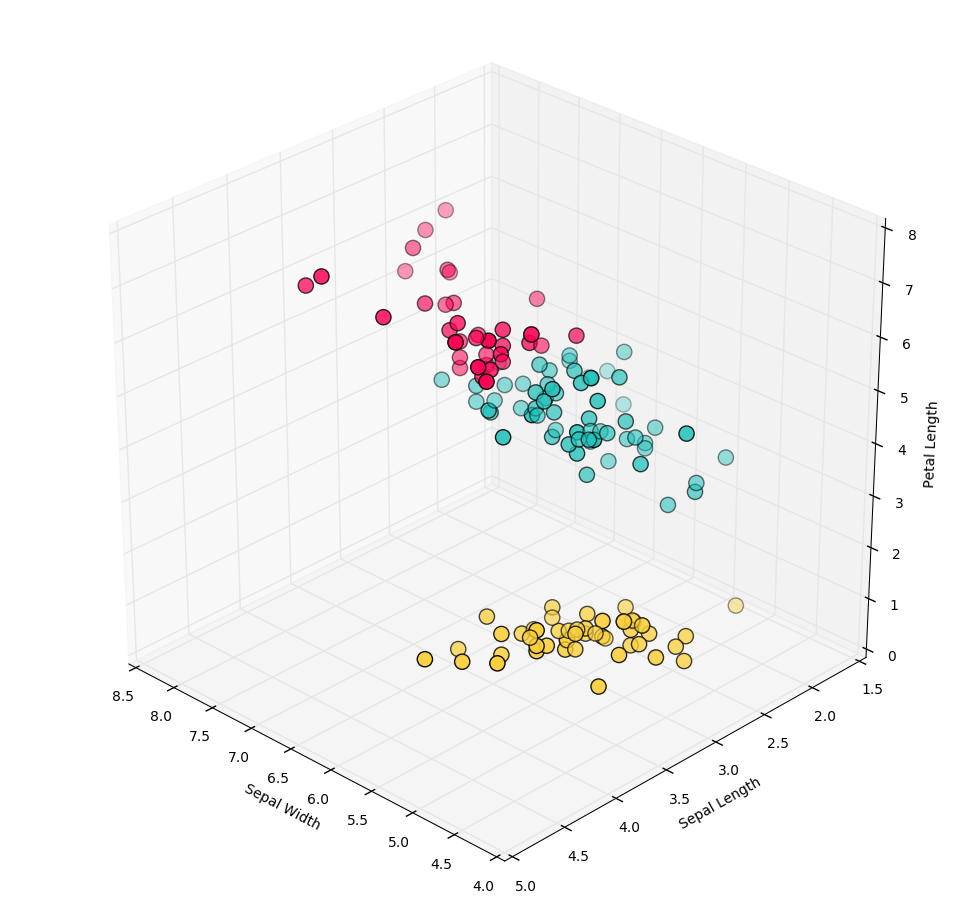

In [15]:
from mpl_toolkits.mplot3d import Axes3D
plt.suptitle('3d plot', fontsize=15)
ax = Axes3D(plt.figure(figsize=(10, 9)), rect=[.01, 0, 0.95, 1], elev=30, azim=134)
ax.scatter(d[:,0], d[:,1], d[:,2], c = colors[y_kmeans], s=120)
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Sepal Length')
ax.set_zlabel('Petal Length')

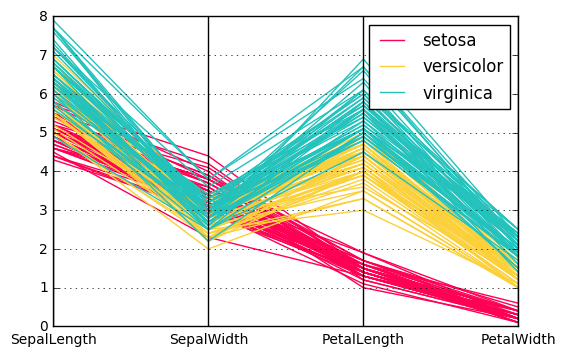

In [10]:
from pandas.tools.plotting import parallel_coordinates

features = [name[:-5].title().replace(' ', '') for name in iris.feature_names]
iris_df = pd.DataFrame(iris.data, columns = features)
iris_df['Name'] = iris.target_names[iris.target]
parallel_coordinates(frame=iris_df, class_column='Name', 
                     color=('#FF0054', '#FBD039', '#23C2BC'))

### Determining the number of clusters

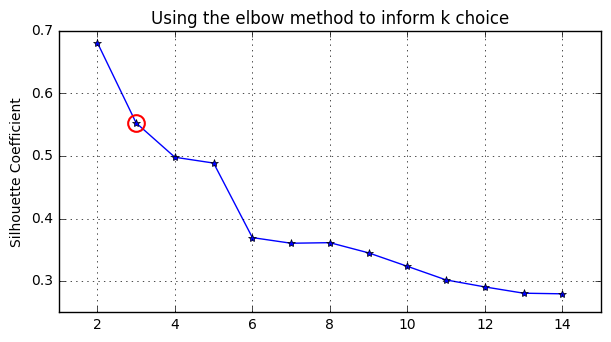

In [16]:
'''
DETERMINING THE NUMBER OF CLUSTERS
How do you choose k? There isn't a bright line, but we can evaluate 
performance metrics such as the silhouette coefficient and within sum of 
squared errors across values of k.

scikit-learn Clustering metrics documentation:
http://scikit-learn.org/stable/modules/classes.html#clustering-metrics
'''

# Create a bunch of different models
k_rng = range(1,15)
est = [KMeans(n_clusters = k).fit(d) for k in k_rng]

#================================
# Option 1: Silhouette Coefficient
# Generally want SC to be closer to 1, while also minimizing k

from sklearn import metrics
silhouette_scores = [metrics.silhouette_score(d, e.labels_, metric='euclidean') for e in est[1:]]

silhouette_scores

# Plot the results
plt.figure(figsize=(7, 8))
plt.subplot(211)
plt.title('Using the elbow method to inform k choice')
plt.plot(k_rng[1:], silhouette_scores, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.ylabel('Silhouette Coefficient')
plt.plot(3,silhouette_scores[1], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


[680.82439999999997, 152.368706477339, 78.940841426146079, 57.317873214285747, 46.535582051282105, 38.964787851037833, 34.196982162574265, 29.963345571095569, 28.224020322298948, 25.935348994143098, 24.41026578650105, 22.697286764705911, 21.69449533799537, 20.429848404519465]


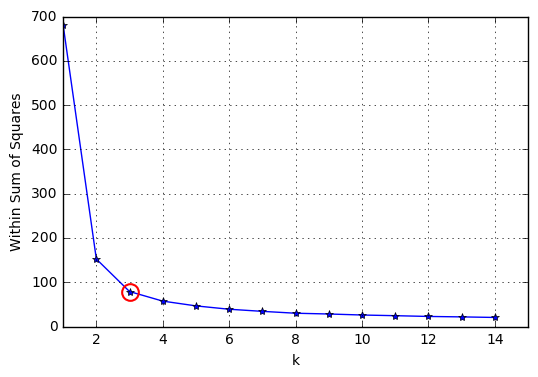

In [17]:
# Option 2: Within Sum of Squares (a.k.a., inertia)
# Generally want to minimize WSS, while also minimizing k

within_sum_squares = [e.inertia_ for e in est]

print within_sum_squares


# Plot the results
plt.plot(k_rng, within_sum_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Within Sum of Squares')
plt.plot(3,within_sum_squares[2], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


# Lab Part 2. Analysing songs

In [21]:
df = pd.read_csv('songs.csv')

In [22]:
df.shape

(235, 314)

In [23]:
# explore
df.head()

,name,party rhymes,folk influences,indian influences,use of ambient synths,sexist lyrics,catchy hooks,Puerto Rican roots,a knack for catchy hooks,subtle use of white noise,...,smooth synth textures,use of techno synths,ska influences,prominent drums,cash obsessed lyrics,surreal lyrics,rhythmic clapping,jazz influences,arpeggiated synths,varying tempo and time signatures
0,/andybody/1st-bass-is-deepest-single/1st-bass-...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,/angels-airwaves/everythings-magic/everythings...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,/angels-airwaves/i-empire/call-to-arms,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,/angels-airwaves/i-empire/secret-crowds,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,/angels-airwaves/warped-tour-2008-compilation/...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
# perform clustering with 4 clusters
song_cluster = KMeans(n_clusters=4, init='random')
song_cluster.fit(df.drop('name', axis=1))
y_kmeans = song_cluster.predict(df.drop('name', axis=1))

Silhoute is a measure of cluster cohesiveness. See the sklearn code for a plot:
http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [29]:

# get info on one cluster
for cluster_in_question in range(0,4):
    # get center of cluster
    "centroid", song_cluster.cluster_centers_[cluster_in_question]
    # grab songs in dataframe that belong to this cluster
    songs = df[np.where(y_kmeans == cluster_in_question, True, False)]['name']
    # look at top five qualities in cluster
    print sorted(zip(df.columns[1:], song_cluster.cluster_centers_[cluster_in_question]), key=lambda x:x[1], reverse=True)[1:6]
    print
 
from sklearn import metrics
metrics.silhouette_score(df.drop('name',axis=1), song_cluster.labels_, metric='euclidean')   


[('mild rhythmic syncopation', 0.27956989247311831), ('extensive vamping', 0.23655913978494625), ('electronica influences', 0.23655913978494614), ('acoustic rhythm guitars', 0.23655913978494608), ('mixed acoustic and electric instrumentation', 0.22580645161290325)]

[('punk influences', 0.45833333333333337), ('repetitive melodic phrasing', 0.37499999999999989), ('extensive vamping', 0.36111111111111105), ('mild rhythmic syncopation', 0.36111111111111105), ('electric guitar riffs', 0.29166666666666685)]

[('use of modal harmonies', 0.69811320754716988), ('synth riffs', 0.66037735849056578), ('prevalent use of groove', 0.6037735849056608), ('effected synths', 0.60377358490566024), ('a highly synthetic sonority', 0.58490566037735836)]

[('electronica influences', 0.88235294117647034), ('consistent rhyme patterns', 0.82352941176470607), ('syncopated beats', 0.76470588235294101), ('hardcore rap influence', 0.64705882352941158), ('the use of chordal patterning', 0.58823529411764719)]



0.036803971728341302

In [37]:
# perform k means with up to 15 clusters
# similar to grid search, just using a list
# comprehension
k_rng = range(1,15)
est = [KMeans(n_clusters = k).fit(df.drop('name',axis=1)) for k in k_rng]

# What do these clusters look like?

Plot the clusters!

In [44]:
# Write code to plot the clusters




## 3. Cluster Validation

C:\Users\Madhu\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Madhu\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


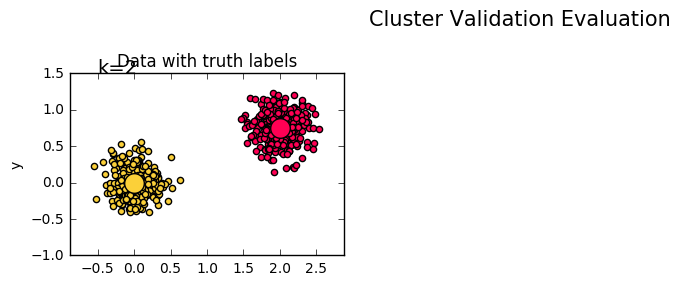

In [45]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn import metrics

np.random.seed(0)

'''
K = 2
'''

# Generate and Plot Dummy Data for k = 2
centres = [[2, 0.75], [0, 0]]
X0, labels0_true = make_blobs(n_samples=300, centers=centres[0], cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=300, centers=centres[1], cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1))
labels_true = np.concatenate((labels0_true,labels1_true+1))
colors = np.array(['#FF0054','#FBD039'])
plt.figure(figsize=(12, 8))
plt.suptitle('Cluster Validation Evaluation', fontsize=15)
plt.subplot(331)
plt.text(-0.5, 1.5, 'k=2', fontsize=14)
for k, col in zip(range(2), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.title('Data with truth labels')
plt.ylabel('y')


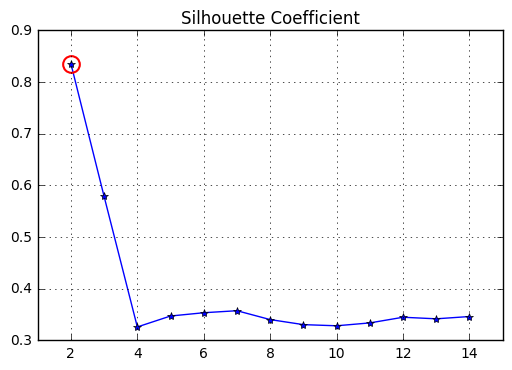

In [47]:
# Calculate Silhouette Scores for k = 2
k_rng = range(1,15)
est = [KMeans(n_clusters = k).fit(X) for k in k_rng]
silhouette_score = [metrics.silhouette_score(X, e.labels_, metric='euclidean') for e in est[1:]]
plt.plot(k_rng[1:], silhouette_score, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.title('Silhouette Coefficient')
plt.plot(2,silhouette_score[0], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


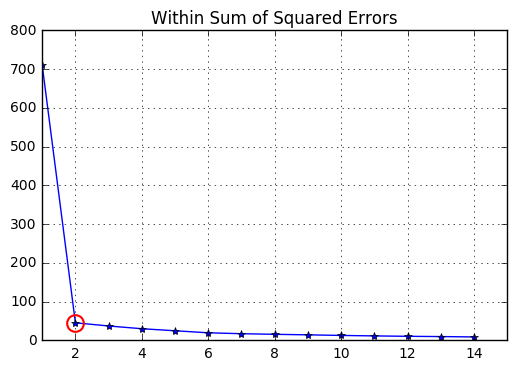

In [48]:
# Calculate the within sum of squared errors for k = 2
within_sum_squares = [e.inertia_ for e in est]
plt.plot(k_rng, within_sum_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.title('Within Sum of Squared Errors')
plt.plot(2,within_sum_squares[1], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


C:\Users\Madhu\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Madhu\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Madhu\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning

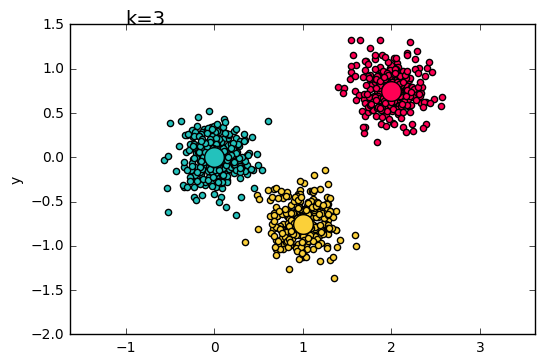

In [49]:
'''
K = 3
'''

# Generate and Plot Dummy Data for k = 3
centres = [[2, 0.75], [1, -0.75], [0, 0]]
X0, labels0_true = make_blobs(n_samples=300, centers=centres[0], cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=300, centers=centres[1], cluster_std=[[0.2,0.2]])
X2, labels2_true = make_blobs(n_samples=300, centers=centres[2], cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1,X2))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2))
colors = np.array(['#FF0054','#FBD039','#23C2BC'])
plt.text(-1, 1.5, 'k=3', fontsize=14)
for k, col in zip(range(3), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.ylabel('y')

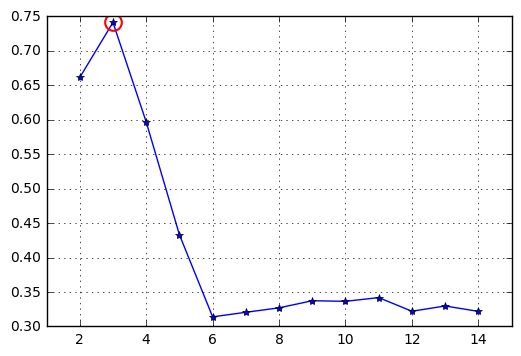

In [50]:

# Calculate Silhouette Scores for k = 3
est = [KMeans(n_clusters = k).fit(X) for k in k_rng]
silhouette_score = [metrics.silhouette_score(X, e.labels_, metric='euclidean') for e in est[1:]]
plt.plot(k_rng[1:], silhouette_score, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.plot(3,silhouette_score[1], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

         

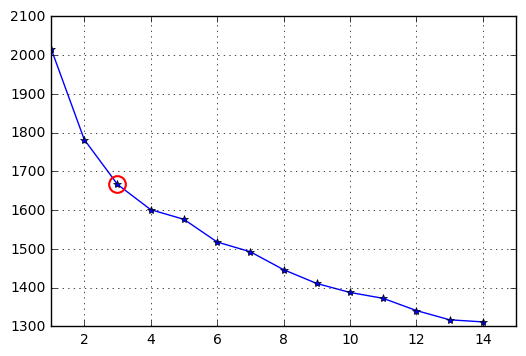

In [14]:
# Calculate the within sum of squared errors for k = 3
within_sum_squares = [e.inertia_ for e in est]
plt.plot(k_rng, within_sum_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.plot(3,within_sum_squares[2], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


C:\Users\Madhu\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Madhu\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Madhu\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning

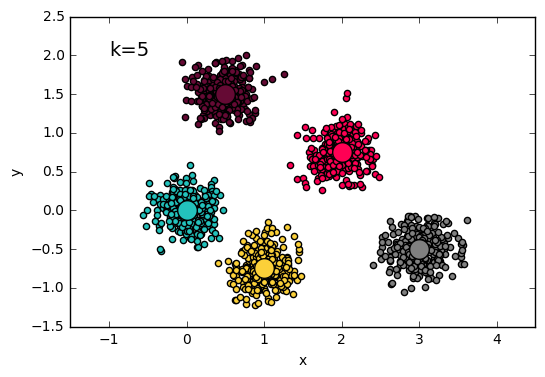

In [51]:
# Generate and Plot Dummy Data for k = 5
centres = [[2, 0.75], [1, -0.75], [0, 0], [0.5, 1.5], [3, -0.5]]
X0, labels0_true = make_blobs(n_samples=300, centers=centres[0], cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=300, centers=centres[1], cluster_std=[[0.2,0.2]])
X2, labels2_true = make_blobs(n_samples=300, centers=centres[2], cluster_std=[[0.2,0.2]])
X3, labels3_true = make_blobs(n_samples=300, centers=centres[3], cluster_std=[[0.2,0.2]])
X4, labels4_true = make_blobs(n_samples=300, centers=centres[4], cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1,X2,X3,X4))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2,
                              labels3_true+3,labels4_true+4))
colors = np.array(['#FF0054','#FBD039','#23C2BC', '#650A34', '#808080'])
plt.text(-1, 2, 'k=5', fontsize=14)
for k, col in zip(range(5), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')

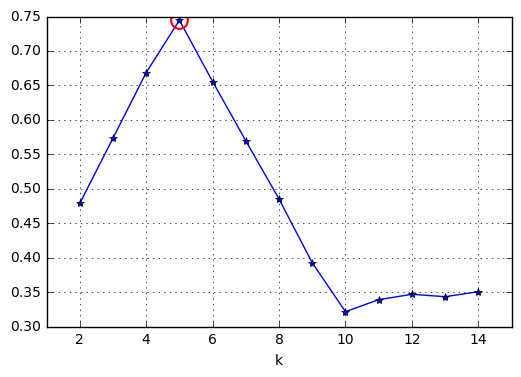

In [52]:
# Calculate Silhouette Scores for k = 5
est = [KMeans(n_clusters = k).fit(X) for k in k_rng]
silhouette_score = [metrics.silhouette_score(X, e.labels_, metric='euclidean') for e in est[1:]]
plt.plot(k_rng[1:], silhouette_score, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.xlabel('k')
plt.plot(5,silhouette_score[3], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

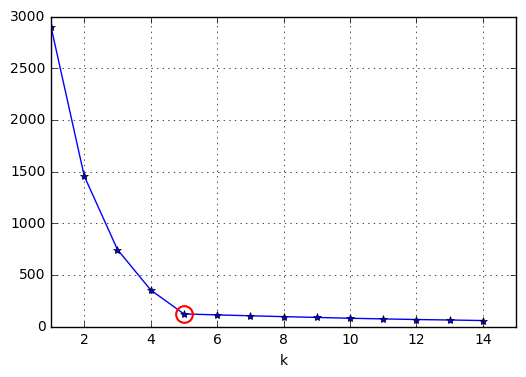

In [53]:
# Calculate the within sum of squared errors for k = 5
within_sum_squares = [e.inertia_ for e in est]
plt.plot(k_rng, within_sum_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.xlabel('k')
plt.plot(5,within_sum_squares[4], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

## 4. Kmeans Limitations

C:\Users\Madhu\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Madhu\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Madhu\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning

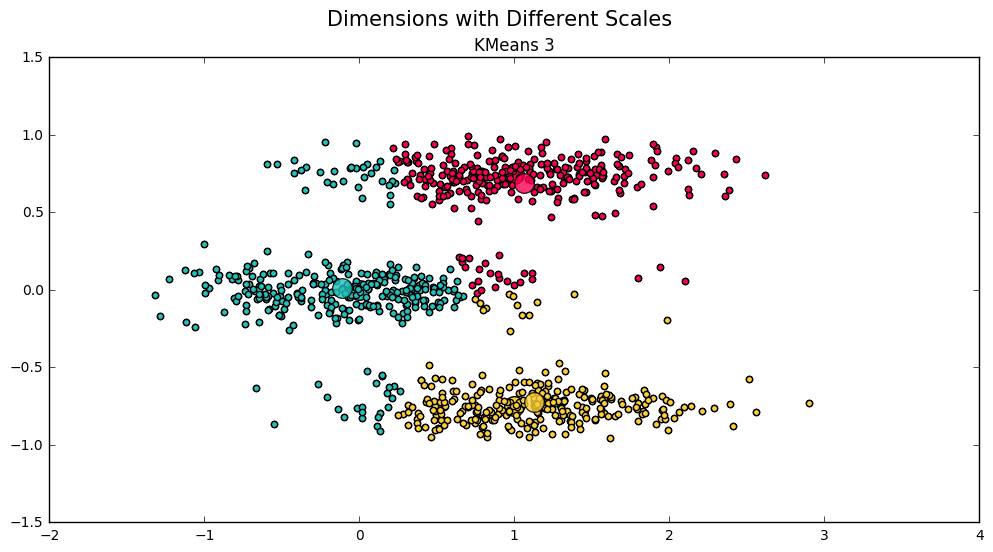

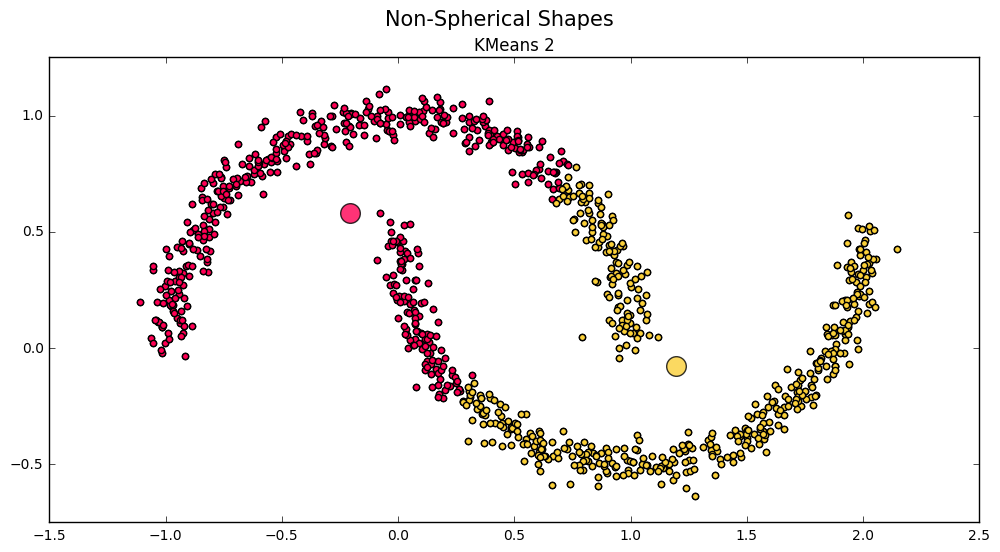

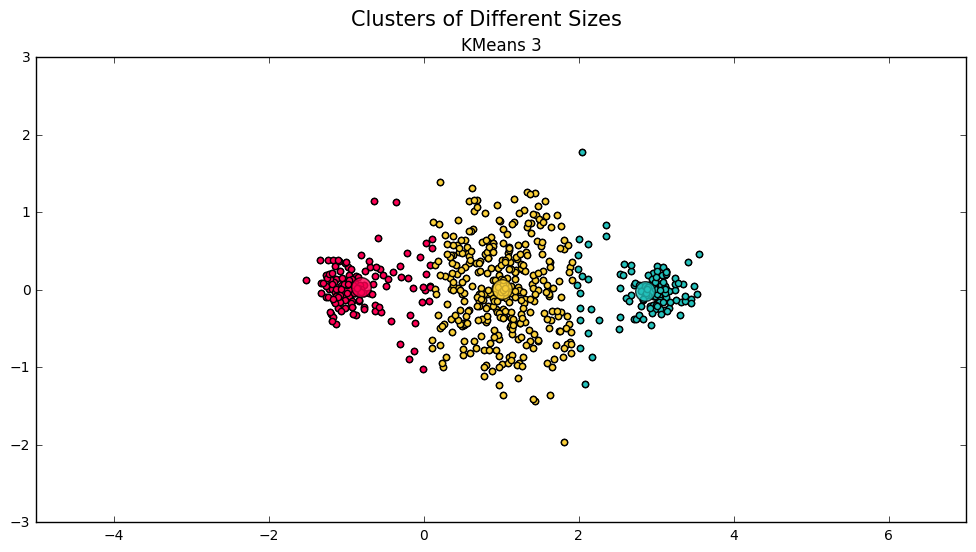

In [54]:
'''
NOTES ON LIMITATIONS OF K-MEANS CLUSTERING

Adapted from Bart Baddely's 2014 PyData Presentation:
http://nbviewer.ipython.org/github/BartBaddeley/PyDataTalk-2014/blob/master/PyDataTalk.ipynb

Agenda: 
1) K-means might not work when dimensions have different scales
2) K-means might not work for non-spherical shapes
3) K-means might not work for clusters of different sizes
'''

from sklearn.cluster import KMeans
import numpy as np
from sklearn.datasets.samples_generator import make_blobs, make_moons
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

'''
1) DIMENSIONS WITH DIFFERENT SCALES
'''

# Generate data with differing variances
np.random.seed(0)

centres = [[1, 0.75], [1, -0.75], [0, 0]]

X0, labels0_true = make_blobs(n_samples=300, centers=centres[0], cluster_std=[[0.6,0.1]])
X1, labels1_true = make_blobs(n_samples=300, centers=centres[1], cluster_std=[[0.6,0.1]])
X2, labels2_true = make_blobs(n_samples=300, centers=centres[2], cluster_std=[[0.6,0.1]])
X = np.concatenate((X0,X1,X2))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2))

colors = np.array(['#FF0054','#FBD039','#23C2BC'])

plt.figure(figsize=(12, 6))
plt.suptitle('Dimensions with Different Scales', fontsize=15)
for k, col in zip(range(3), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.title('Original data')

# Compute clustering with 3 Clusters
k_means_3 = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means_3.fit(X)
k_means_3_labels = k_means_3.labels_
k_means_3_cluster_centres = k_means_3.cluster_centers_

# Plot result
distance = euclidean_distances(k_means_3_cluster_centres,
                               centres,
                               squared=True)
order = distance.argmin(axis=0)
for k, col in zip(range(3), colors):              
    my_members = k_means_3_labels == order[k]
    plt.scatter(X[my_members, 0], X[my_members, 1],c=col, marker='o', s=20)           
    cluster_center = k_means_3_cluster_centres[order[k]]
    plt.scatter(cluster_center[0], cluster_center[1], marker = 'o', c=col, s=200, alpha=0.8)            
plt.axis('equal')
plt.title('KMeans 3')

'''
#2: NON-SPHERICAL SHAPES
'''

[X, true_labels] = make_moons(n_samples=1000, noise=.05)

plt.figure(figsize=(12, 6))
plt.suptitle('Non-Spherical Shapes', fontsize=15)
for k, col in zip(range(2), colors):
    my_members = true_labels == k
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o', s=20)

plt.axis('equal')
plt.title('Original Data') 
    
# Compute clustering with 2 Clusters
k_means_2 = KMeans(init='k-means++', n_clusters=2, n_init=10)
k_means_2.fit(X)
k_means_2_labels = k_means_2.labels_
k_means_2_cluster_centers = k_means_2.cluster_centers_

for k, col in zip(range(2), colors):           
    my_members = k_means_2_labels == k
    plt.scatter(X[my_members, 0], X[my_members, 1],c=col, marker='o', s=20)     
    cluster_center = k_means_2_cluster_centers[k]
    plt.scatter(cluster_center[0], cluster_center[1], marker = 'o', c=col, s=200, alpha=0.8) 
plt.axis('equal')
plt.title('KMeans 2')

'''
#3: CLUSTERS OF DIFFERENT SIZES
'''

np.random.seed(0)

centres = [[-1, 0], [1, 0], [3, 0]]

X0, labels0_true = make_blobs(n_samples=100, centers=centres[0], cluster_std=[[0.2,0.2]])
X1, labels1_true = make_blobs(n_samples=400, centers=centres[1], cluster_std=[[0.6,0.6]])
X2, labels2_true = make_blobs(n_samples=100, centers=centres[2], cluster_std=[[0.2,0.2]])
X = np.concatenate((X0,X1,X2))
labels_true = np.concatenate((labels0_true,labels1_true+1,labels2_true+2))

plt.figure(figsize=(12, 6))
plt.suptitle('Clusters of Different Sizes', fontsize=15)
for k, col in zip(range(3), colors):
    my_members = labels_true == k
    cluster_center = centres[k]
    plt.scatter(X[my_members, 0], X[my_members, 1], c=col, marker='o',s=20) 
    plt.scatter(cluster_center[0], cluster_center[1], c=col, marker='o', s=200)
plt.axis('equal')
plt.title('Original data')

# Compute clustering with 3 Clusters
k_means_3 = KMeans(init='k-means++', n_clusters=3, n_init=10)
k_means_3.fit(X)
k_means_3_labels = k_means_3.labels_
k_means_3_cluster_centres = k_means_3.cluster_centers_

# Plot result
distance = euclidean_distances(k_means_3_cluster_centres,
                               centres,
                               squared=True)
order = distance.argmin(axis=0)
for k, col in zip(range(3), colors):              
    my_members = k_means_3_labels == order[k]
    plt.scatter(X[my_members, 0], X[my_members, 1],c=col, marker='o', s=20)           
    cluster_center = k_means_3_cluster_centres[order[k]]
    plt.scatter(cluster_center[0], cluster_center[1], marker = 'o', c=col, s=200, alpha=0.8)            
plt.axis('equal')
plt.title('KMeans 3')